<a href="https://colab.research.google.com/github/Pragadesh-45/AI-Notebooks/blob/main/AlexNet_implementation_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
#normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential([
        #1st layer
        Conv2D(48, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        #2nd layer
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        #3rd layer
        Conv2D(192, (3, 3), padding='same', activation='relu'),
        Conv2D(192, (3, 3), padding='same', activation='relu'),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # 3 fully connected layers
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')#output layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 48)        192       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 48)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       55424     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 128)       512       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
782/782 [==============================] - 20s 14ms/step - loss: 1.4185 - accuracy: 0.4864 - val_loss: 1.6184 - val_accuracy: 0.4688
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0366 - accuracy: 0.6399 - val_loss: 1.0804 - val_accuracy: 0.6248
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 0.8748 - accuracy: 0.7012 - val_loss: 0.9965 - val_accuracy: 0.6641
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.7763 - accuracy: 0.7359 - val_loss: 0.9229 - val_accuracy: 0.6755
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.7036 - accuracy: 0.7621 - val_loss: 1.0086 - val_accuracy: 0.6683
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.6465 - accuracy: 0.7791 - val_loss: 0.8104 - val_accuracy: 0.7264
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.5922 - accuracy: 0.7995 - val_loss: 0.8904 - val_accuracy: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8344793915748596
Test accuracy: 0.7281000018119812


In [ ]:
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 3ms/step


array([[1.10327790e-03, 1.53971181e-04, 1.37618706e-02, ...,
        5.04136877e-03, 1.79237715e-04, 6.10213145e-04],
       [3.61681396e-06, 5.62801445e-03, 1.06000478e-07, ...,
        1.74363666e-11, 9.94121492e-01, 2.45905481e-04],
       [1.41731337e-01, 8.88925865e-02, 5.53467497e-02, ...,
        1.19740866e-01, 1.82202652e-01, 1.40152588e-01],
       ...,
       [7.37534219e-17, 6.20194546e-18, 4.96776398e-10, ...,
        5.21631566e-12, 1.32854874e-19, 1.12547226e-16],
       [3.74568492e-01, 2.61568576e-01, 3.06681748e-02, ...,
        7.91609474e-03, 1.32091030e-01, 3.52744535e-02],
       [3.01717336e-08, 5.85414584e-13, 5.33449281e-07, ...,
        9.49760020e-01, 6.72958174e-12, 8.24942159e-09]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

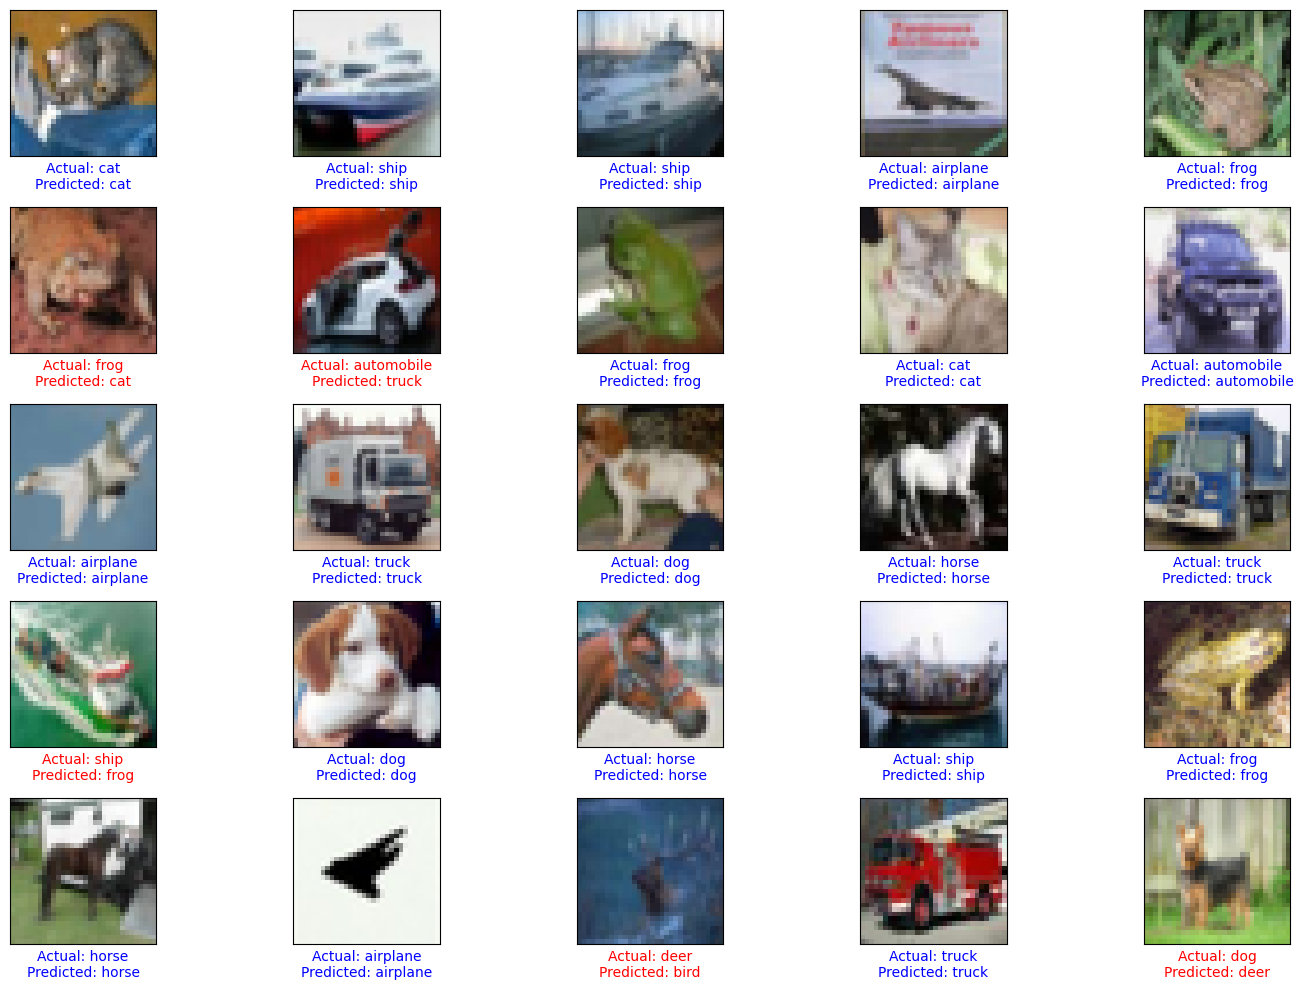

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(25):  # Let's visualize 25 images
      plt.subplot(5, 5, i + 1)
      plt.imshow(x_test[i])
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)

      true_label = true_classes[i]
      predicted_label = predicted_classes[i]

      if predicted_label == true_label:
          color = 'blue'
      else:
          color = 'red'
      plt.xlabel(f"Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color=color)
plt.tight_layout()
plt.show()